minimum alpha =  0.500342298157


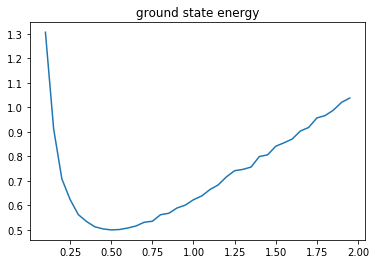

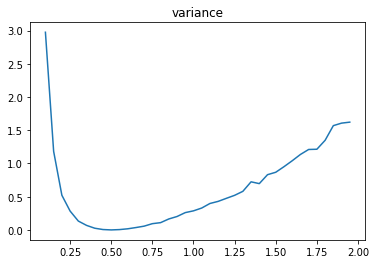

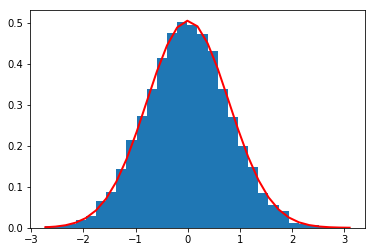

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

## variational quantum monte carlo simulation

## initialize

N = 10000
alpha = np.arange(0.1, 2, 0.05)
sigma = 1/np.sqrt(4*alpha)

E_loc = np.zeros([N,len(sigma)])
E = np.zeros([len(sigma)])
var = np.zeros([len(sigma)])



def dens_function(alpha, x):
    density = np.sqrt(alpha/np.pi)*np.sqrt(alpha/np.pi)*np.exp(-2*alpha*x**2)
    return(density)

def local_energy_1D(alpha,x):
    E_loc = alpha + (x**2)*(0.5-2*alpha**2)
    return(E_loc)

def normal_dis(sigma):
    prob_dens = np.random.normal(0, sigma, N)
    return(prob_dens)
    
def expectation_value(E_loc):
    E = (1/N)*np.sum(E_loc)
    return(E)

def variance(E_loc):
    var = (1/N)*np.sum(E_loc**2) - ((1/N)*np.sum(E_loc))**2
    return(var)

def derivative_E(alpha):
    sigma = 1/np.sqrt(4*alpha)
    prob_dens = normal_dis(sigma)
    E_loc = alpha + (prob_dens**2)*(0.5-2*alpha**2)
    E_ground = expectation_value(E_loc)
    deriv_E = 2*(expectation_value(-E_loc*prob_dens**2) - E_ground*expectation_value(-prob_dens**2))
    return(deriv_E)

def minimization_alpha():
    gamma = 0.1
    tol = 0.0001
    max_it = 10000
    alpha_min = 1.2
    difference = 1.2
    i = 0
    
    while abs(difference) >= tol and i < max_it:
        keep = alpha_min
        alpha_min = alpha_min - gamma * derivative_E(alpha_min)
        difference = alpha_min - keep
        i += 1
    print("minimum alpha = ", alpha_min)
    
    
def vmc():
    for i in range(len(sigma)):
        prob_dens = normal_dis(sigma[i])
        E_loc[:,i] = local_energy_1D(alpha[i], prob_dens)
        E[i] = expectation_value(E_loc[:,i])
        var[i] = variance(E_loc[:,i])
        
    return(E, var)

def metropolis_algorithm(N, alpha):
    x = np.zeros(N)
    x[0] = 0.1
    h = 1/1000
    eta = np.random.uniform(0,1)
    t = 0
    for i in range(len(x)):
        x_trial = np.random.uniform(-h/2, h/2)
        x_trial = x[i-1] + x_trial
        r = dens_function(alpha, x_trial)/dens_function(alpha, x[i])
        if r >= 1:
            t = t + 1
            x[i] = x_trial
        else:
            if eta < r:
                x[i] = x_trial
            else:
                x[i] = x[i-1]
    acceptance_ratio = t/len(x)
    print(acceptance_ratio)
    
    return(x)



## run program

E_ground, variance = vmc()
minimization_alpha()



## plots

plt.figure()
plt.plot(alpha, E_ground)
plt.title('ground state energy')

plt.figure()
plt.plot(alpha, variance)
plt.title('variance')



## histogram probability distribution function

alpha = 0.4
sigma = 1/np.sqrt(4*alpha)
density = normal_dis(sigma)

plt.figure()
count, bins, ignored = plt.hist(density, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
np.exp( - (bins)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()


    




    
    
